In [5]:
import xarray as xr
import numpy as np

In [3]:
path = '/Users/jonniebarnsley/Downloads/antarctica_bedmachine_inverse_1km.nc'
file = xr.open_dataset(path)
file

<xarray.Dataset>
Dimensions:  (x: 6144, y: 6144)
Coordinates:
  * x        (x) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.142e+06 6.144e+06
  * y        (y) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.142e+06 6.144e+06
Data variables:
    crs      int32 ...
    umod     (y, x) float64 ...
    umodc    (y, x) float64 ...
    btrc     (y, x) float64 ...
    velx     (y, x) float64 ...
    vely     (y, x) float64 ...
Attributes: (12/14)
    Conventions:         CF-1.7
    component_0:         umod
    component_1:         umodc
    component_2:         btrc
    component_3:         velx
    component_4:         vely
    ...                  ...
    num_components:      5
    num_levels:          1
    crs_origin_x:        0.0
    crs_origin_y:        0.0
    dx:                  1000.0
    Conversion_history:  slc removed this feature to see if it was causing chaos

In [23]:
btrc = file.btrc
umod = file.umod
ms = np.arange(0.2, 1, 0.1)

C = {}
for i, m in enumerate(ms):
    C_m = btrc * (1 + umod ** (1 - m))
    name = f'm{i+1:02d}'
    C[name] = C_m

In [24]:
x = file.x
y = file.y

ds = xr.Dataset(
    data_vars=C,
    coords={
        'x': x,
        'y': y
    },
    attrs={
        'description': 'Initial guesses for bed friction inversions for different m values',
        'long_name': 'Bed friction coefficient',
    }
)
ds

<xarray.Dataset>
Dimensions:  (x: 6144, y: 6144)
Coordinates:
  * x        (x) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.142e+06 6.144e+06
  * y        (y) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.142e+06 6.144e+06
Data variables:
    m01      (y, x) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0 100.0
    m02      (y, x) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0 100.0
    m03      (y, x) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0 100.0
    m04      (y, x) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0 100.0
    m05      (y, x) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0 100.0
    m06      (y, x) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0 100.0
    m07      (y, x) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0 100.0
    m08      (y, x) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0 100.0
Attributes:
    description:  Initial guesses for bed friction inversions for different m...
    long_name:    Bed friction coefficient

In [25]:
encoding = {
    var: {'zlib': True, 'complevel': 5} for var in ds.data_vars
}
ds.to_netcdf("/Users/jonniebarnsley/data/inversions/perturb_m.nc", encoding=encoding)

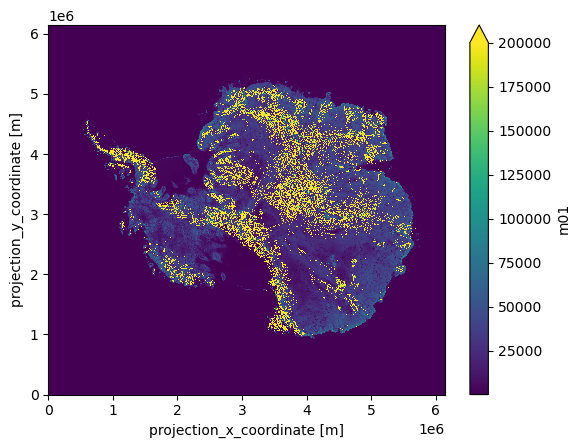

In [27]:
ds.m01.plot(vmax=2e5)

In [49]:
def norm(field):

    xgrad, ygrad = np.gradient(field)
    grad = np.hypot(xgrad, ygrad)
    norm = np.linalg.norm(grad)

    return norm

In [29]:
norm(ds.m01.values)

591402233.6546122

In [30]:
norm(ds.m08.values)

247274939.29731318

In [31]:
norm(file.btrc.values)

119208287.0280065

In [32]:
norm(np.log10(ds.m01.values))

1154.3883610005196

In [43]:
corrected = np.log10(ds.m01.values) + (1-0.2) * np.log10(file.umod.where(file.umod.values > 0)).fillna(0)

In [44]:
xgrad, ygrad = np.gradient(corrected)
grad = np.hypot(xgrad, ygrad)
norm = np.linalg.norm(grad)
norm

1184.0850256815766

In [50]:
norm(np.log10(file.btrc))

1219.8706159626727

In [47]:
file

<xarray.Dataset>
Dimensions:  (x: 6144, y: 6144)
Coordinates:
  * x        (x) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.142e+06 6.144e+06
  * y        (y) float64 500.0 1.5e+03 2.5e+03 ... 6.142e+06 6.142e+06 6.144e+06
Data variables:
    crs      int32 ...
    umod     (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    umodc    (y, x) float64 ...
    btrc     (y, x) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0 100.0
    velx     (y, x) float64 ...
    vely     (y, x) float64 ...
Attributes: (12/14)
    Conventions:         CF-1.7
    component_0:         umod
    component_1:         umodc
    component_2:         btrc
    component_3:         velx
    component_4:         vely
    ...                  ...
    num_components:      5
    num_levels:          1
    crs_origin_x:        0.0
    crs_origin_y:        0.0
    dx:                  1000.0
    Conversion_history:  slc removed this feature to see if it was causing chaos